In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [5]:
# load package for loading data
housing_dataset = pd.read_csv('boston_housing.csv')

In [6]:
housing_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [7]:
X = housing_dataset[['RM']].values
y = housing_dataset[['MEDV']].values

In [8]:
y=y.flatten()

In [9]:
# load package for spliting data


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
y_train

array([28.7, 21.2, 19.3, 23.1, 19.1, 25. , 33.4,  5. , 29.6, 18.7, 21.7,
       23.1, 22.8, 21. , 48.8, 14.6, 16.6, 27.1, 20.1, 19.8, 21. , 41.3,
       23.2, 20.4, 18.5, 29.4, 36.4, 24.4, 11.8, 13.8, 12.3, 17.8, 33.1,
       26.7, 13.4, 14.4, 50. , 22. , 19.9, 23.8, 17.5, 12.7,  5.6, 31.1,
       26.2, 19.4, 16.7, 13.8, 22.9, 15.3, 27.5, 36.1, 22.9, 24.5, 25. ,
       50. , 34.9, 31.7, 24.1, 22.1, 14.1, 42.8, 19.3, 32.2, 26.4, 21.8,
       21.7,  8.3, 46.7, 43.1, 31.5, 10.5, 16.7, 20. , 33.3, 17.8, 50. ,
       20.5, 23.2, 13.1, 19.6, 22.8, 28.7, 30.7, 22.9, 21.9, 23.9, 32.7,
       24.3, 21.5, 24.6,  8.5, 26.4, 23.1, 15. ,  8.8, 19.3, 23.9, 24.7,
       19.8, 23.8, 13.3, 29. , 27.1, 34.6, 13.3, 15.6, 12.5, 14.6, 11. ,
       24.8, 17.3,  8.1, 21.4, 15.6, 23.3, 32. , 38.7, 30.1, 20.5, 32.5,
       42.3, 24.3, 20.6, 22. , 18.2, 15. ,  6.3, 20.1, 21.4, 28.4, 30.1,
       20.8, 23. , 14.3, 11.7, 37.3, 17.1, 10.4, 23. , 22.7, 20.3, 21.7,
       50. ,  8.4, 18.8, 37.2, 16.1, 16.5, 22.2, 20

### Data Visualization

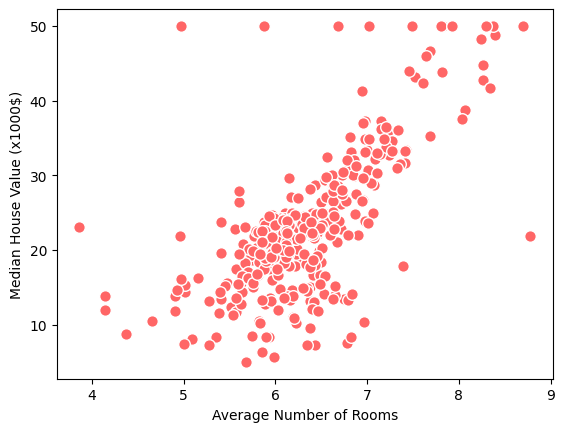

In [12]:
# visualize data
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='#FF6666', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.show()

### Linear Regression (Base)

In [13]:
class LinearRegression:
    def __init__(self):
        self.w = None

    def predict(self, X):
        return X.dot(self.w[1:]) + self.w[0]

    def fit(self, X, y):
        pass

### Gradient Descent

In [14]:
class GradientDescent(LinearRegression):
    def __init__(self, eta=0.01, max_iter=200, random_state=42):
        super().__init__()
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.costs = []

    def fit(self, X, y):
        # Initialize weight values
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])

        self.costs = []
        for iter_i in range(self.max_iter):  # For each iteration,
            y_pred = self.predict(X)  # Predict output of X
            diff = y - y_pred  # Compute the differences

            self.w[0] += self.eta * np.sum(diff)  # Update intercept
            self.w[1:] += self.eta * np.dot(X.T, diff)  # Update coeff
            J = 1/2 * np.sum(diff ** 2)  # Compute cost value
            self.costs.append(J)  # Store cost value at ith-iteration

- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

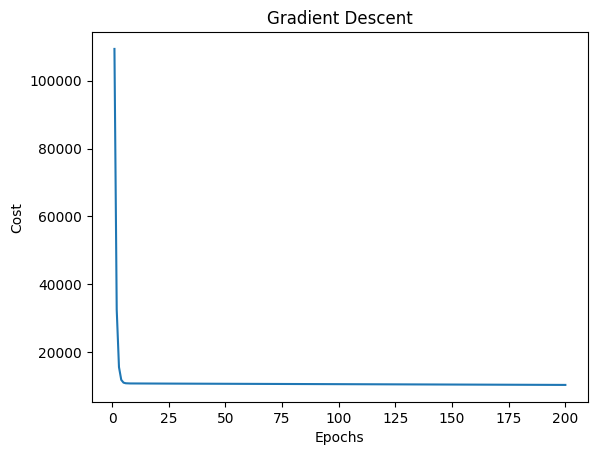

In [15]:
# Initialize the model
reg_GD = GradientDescent(eta=0.0001, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data

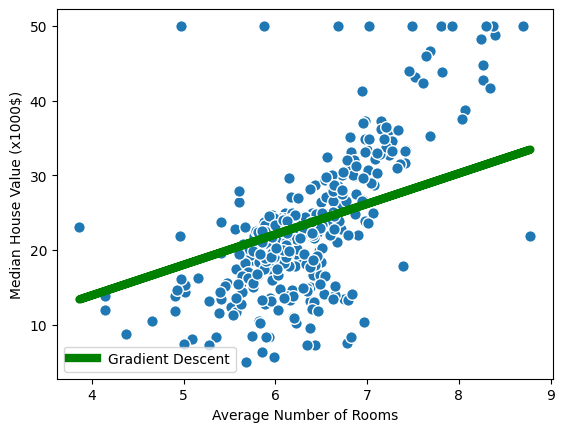

In [16]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [17]:
class StochasticGradientDescent(GradientDescent):
    def __init__(self, eta=0.0001, max_iter=200, random_state=42):
        super().__init__(eta, max_iter, random_state)

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])
        self.cost_trend = []
        for iter_i in range(self.max_iter):
            J = 0.0
            for i, x in enumerate(X):  # Update weights for each sample instead of all samples
                y_pred = self.predict(np.array([x]))
                diff = y[i] - y_pred
                self.w[0] += self.eta * diff
                self.w[1:] += self.eta * x * diff
                J += 1/2 * diff ** 2
            self.cost_trend.append(J)

- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [18]:
# Initialize the model
reg_SGD = StochasticGradientDescent(eta=0.0001, max_iter=200, random_state=42)
# Train model
reg_SGD.fit(X_train, y_train)

Visualize the prediction of Stochastic Gradient Descent model on Training Data

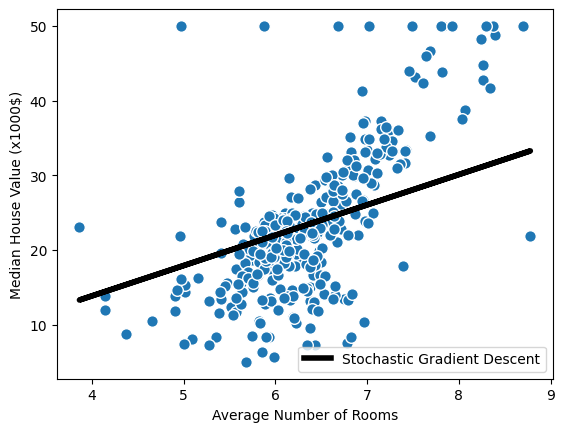

In [19]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
class MyLinearRegression(LinearRegression):
    def fit(self, X, y):
        super().fit(X, y)
        self.w = self.coef_
        return self

In [22]:
# Intialize the Normal Equation model
reg_NE = MyLinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

MyLinearRegression()

Visualize the prediction of Normal Equation model on Training Data

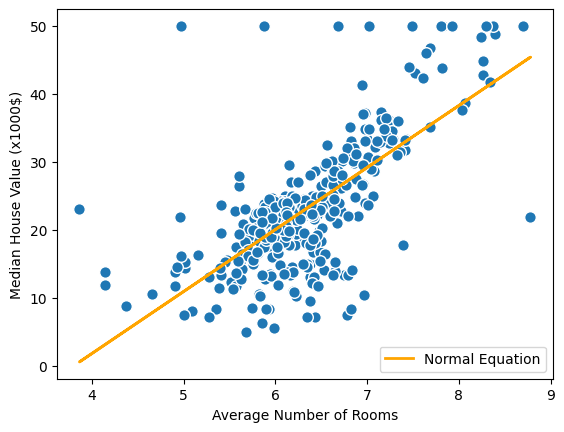

In [23]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

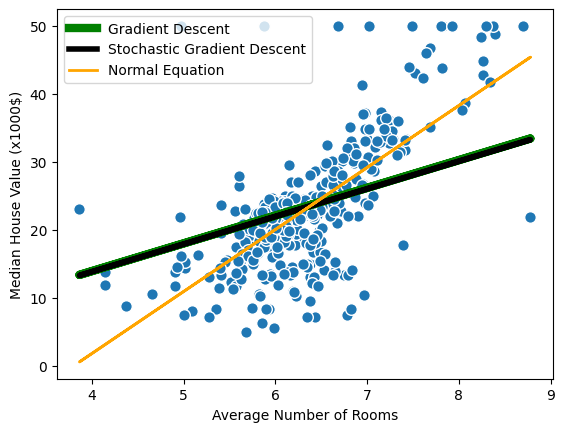

In [24]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [25]:
w_GD = reg_GD.w
w_SGD = reg_SGD.w
w_NE = reg_NE.w
print(w_GD)
print(w_SGD)
print(w_NE)

[-2.39730964  4.08082808]
[-2.40288122  4.0622848 ]
[9.1181022]


Performance Comparisons (on Testing Set)

In [26]:
y_pred_GD = reg_GD.predict(X_test)

In [27]:
y_pred_SGD = reg_SGD.predict(X_test)

In [28]:
y_pred_NE = reg_NE.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [30]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 5.280909
MAE of SGD: 5.243381
MAE of NE: 4.314224


In [31]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 52.518172
MSE of SGD: 52.260806
MSE of NE: 40.35145


In [32]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.295182
R2 of SGD: 0.298636
R2 of NE: 0.458465


## Experiment with Standardized Data

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [34]:
# Re-load the dataset
housing_dataset = pd.read_csv('boston_housing.csv')

In [35]:
# load the package for standardizing data (Standard Scaler)


In [36]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [37]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = housing_dataset[['RM']].values
y = housing_dataset[['MEDV']].values

In [38]:
y = y.flatten()

In [39]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

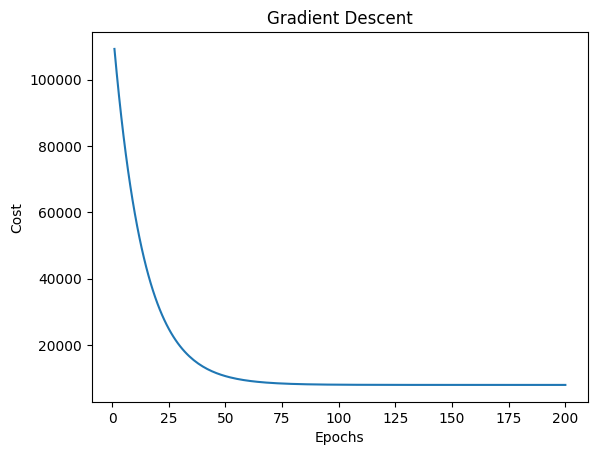

In [40]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = GradientDescent(eta=0.0001, max_iter=200, random_state=42)

# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



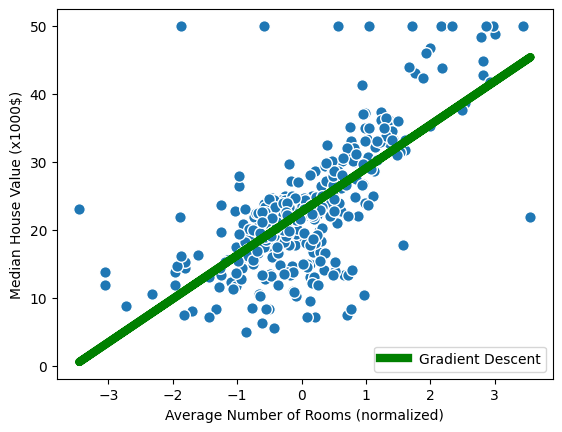

In [41]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [42]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = StochasticGradientDescent(eta=0.0001, max_iter=200, random_state=42)

# Train SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)

Visualize the prediction of Stochastic Gradient Descent model on Training Data


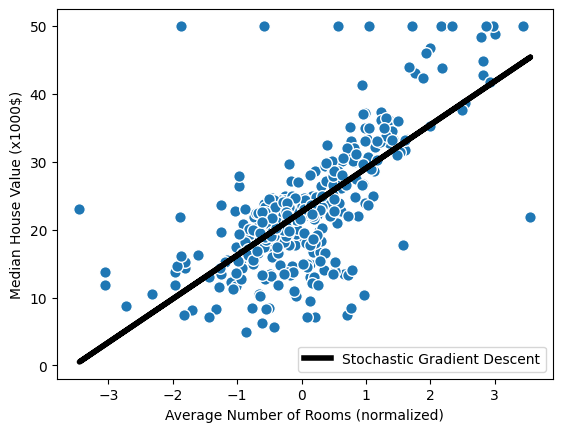

In [43]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [44]:
# Initalize the Normal Equation model
reg_NE = MyLinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

MyLinearRegression()

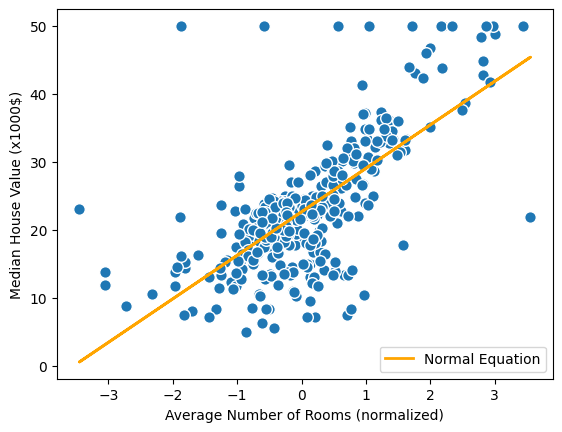

In [45]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

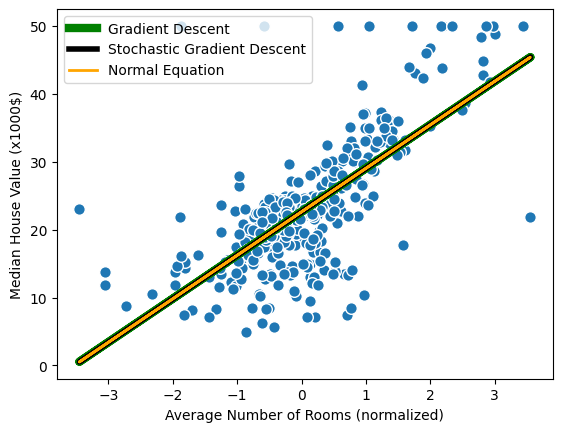

In [46]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [47]:
w_GD = reg_GD.w
w_GD

array([22.62524112,  6.40278095])

In [48]:
w_SGD = reg_SGD.w
w_SGD

array([22.62056551,  6.40433336])

In [49]:
w_NE = reg_NE.w
w_NE

array([6.40020122])

In [50]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [51]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [52]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [53]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 4.312797
MAE of SGD: 4.312378
MAE of NE: 4.314224


In [54]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 40.340053
MSE of SGD: 40.336978
MSE of NE: 40.35145


In [55]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.458618
R2 of SGD: 0.458659
R2 of NE: 0.458465


# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [56]:
# Re-load dataset
housing_dataset = pd.read_csv('boston_housing.csv')

In [57]:
housing_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [58]:
X = housing_dataset[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']].values
y = housing_dataset[["MEDV"]].values

In [59]:
y = y.flatten()

In [60]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

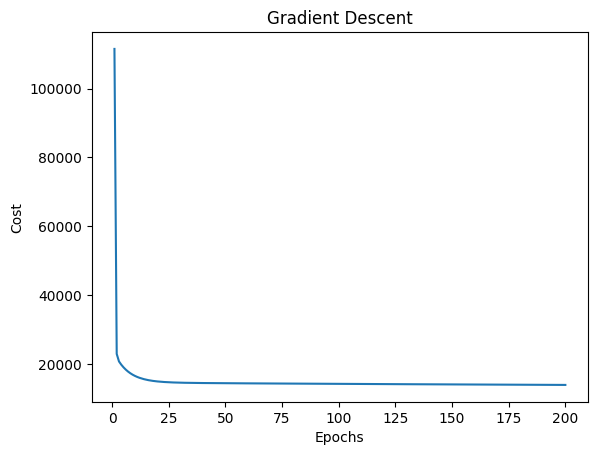

In [61]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-8, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [62]:
# Initialize the SGD model
reg_SGD = StochasticGradientDescent(eta=1e-8, max_iter=200, random_state=42)

# Train model
reg_SGD.fit(X_train, y_train)

### Normal Equation

In [63]:
# Add the '1' column to data
housing_dataset['1'] = 1
housing_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,1
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,1
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,1
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,1


In [64]:
# Intialize the NE model
reg_NE = MyLinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

MyLinearRegression()

### Algorithms Comparisons

In [65]:
w_GD = reg_GD.w
w_GD

array([ 5.52332725e-03, -1.00445650e-02,  4.01250629e-02,  1.00675028e-02,
       -1.98428582e-03, -2.18108357e-03,  2.21876484e-02,  1.02575199e-02,
       -1.72587285e-03,  2.86076003e-03, -1.75953448e-03, -2.76731132e-05,
        6.16464657e-02, -3.74414463e-02])

In [66]:
w_SGD = reg_SGD.w
w_SGD

array([ 5.52397001e-03, -1.00346256e-02,  4.01484103e-02,  1.00785636e-02,
       -1.98160370e-03, -2.18069189e-03,  2.21940773e-02,  1.02507786e-02,
       -1.72752686e-03,  2.86095744e-03, -1.58677268e-03, -2.38120893e-05,
        6.15661519e-02, -3.74571336e-02])

In [67]:
w_NE = reg_NE.w
w_NE

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [68]:
y_pred_GD = reg_GD.predict(X_test)

In [69]:
y_pred_SGD = reg_SGD.predict(X_test)

In [70]:
y_pred_NE = reg_NE.predict(X_test)

In [71]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 6.391988
MAE of SGD: 6.402132
MAE of NE: 3.16271


In [72]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 70.066239
MSE of SGD: 70.076525
MSE of NE: 21.517444


In [73]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.059679
R2 of SGD: 0.059541
R2 of NE: 0.711226


## Experiment with Standardized Data

In [74]:
# Re-load dataset
housing_dataset = pd.read_csv('boston_housing.csv')

In [75]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [76]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [77]:
X_new = housing_dataset[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']].values
y = housing_dataset[["MEDV"]].values

In [78]:
y = y.flatten()

In [79]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

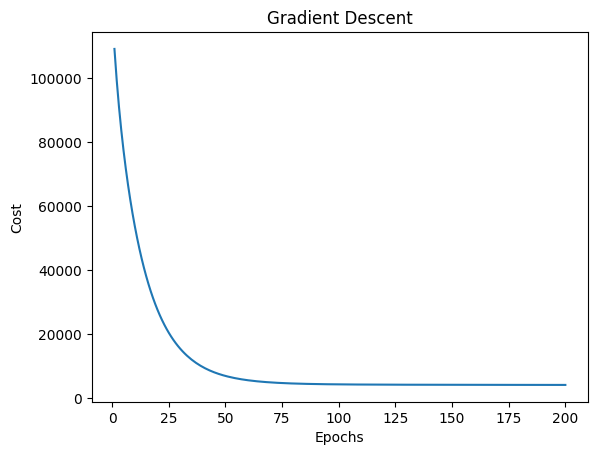

In [80]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-4, max_iter=200, random_state=42)

# Train model on normalized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [81]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = StochasticGradientDescent(eta=0.0001, max_iter=200, random_state=42)

# Train model
reg_SGD.fit(X_train_norm, y_train)

### Normal Equation (sklearn)

In [82]:
# Initialize NE model
reg_NE = MyLinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

MyLinearRegression()

### Algorithms Comparisons

In [83]:
w_GD = reg_GD.w
w_GD

array([22.4771051 , -0.94634802,  0.40285729, -0.05154522,  0.86403959,
       -1.10952874,  3.09171073, -0.39324812, -2.23150523,  0.88239876,
       -0.32128136, -1.86670471,  1.09814471, -3.79012233])

In [84]:
w_SGD = np.append(reg_SGD.w[0], reg_SGD.w[1:])
w_SGD

array([22.47318336, -0.94311207,  0.40184264, -0.04973249,  0.86867285,
       -1.10904141,  3.09233614, -0.3923025 , -2.23214059,  0.88540727,
       -0.3189362 , -1.86600549,  1.09752771, -3.78843862])

In [85]:
w_NE = np.append(reg_NE.w[0], reg_NE.w[1:])
w_NE

array([-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
        2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
       -1.9696347 ,  1.07567771, -3.90310727])

In [86]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [87]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [88]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [89]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 3.207306
MAE of SGD: 3.205044
MAE of NE: 3.16271


In [90]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 22.914828
MSE of SGD: 22.904803
MSE of NE: 21.517444


In [91]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.692472
R2 of SGD: 0.692607
R2 of NE: 0.711226


# Explain what $R^2$ coefficient is.

- Hệ số R bình phương (R2), còn được gọi là hệ số xác định, là một chỉ số thống kê được sử dụng trong mô hình hồi quy để đánh giá mức độ phù hợp của mô hình.

- R2 cho biết phần trăm biến động của biến phụ thuộc (biến mục tiêu) có thể được giải thích bởi biến độc lập (biến dự báo) trong mô hình. Giá trị của R2 nằm trong khoảng từ 0 đến 1:

  + Một giá trị R2 gần với 1 cho thấy rằng mô hình hồi quy có thể giải thích phần lớn biến động của biến phụ thuộc.
  + Một giá trị R2 gần với 0 cho thấy rằng mô hình không thể giải thích được nhiều biến động của biến phụ thuộc.
- Cần lưu ý rằng một giá trị R2 cao không nhất thiết có nghĩa là mô hình là tốt, vì nó có thể bị overfitting (quá khớp) - tức là mô hình quá phức tạp so với dữ liệu và có thể không hoạt động tốt với dữ liệu mới.
- Trong một số trường hợp, khi mô hình không phù hợp với dữ liệu, R2 có thể âm.
- R2 chỉ là một trong nhiều chỉ số cần xem xét khi đánh giá chất lượng của một mô hình hồi quy.

# So sánh chỉ số MAE, MSE và R2 (Original Data)

- Có thể thấy rằng phương pháp Normal Equation (NE) cho kết quả tốt nhất trong cả ba chỉ số được đánh giá: Mean Absolute Error (MAE), R-squared (R2), và Mean Squared Error (MSE). Cụ thể:

  + MAE: NE cho kết quả thấp nhất với 4.314224, so với 5.280909 của Gradient Descent (GD) và 5.243381 của Stochastic Gradient Descent (SGD). Điều này cho thấy NE dự đoán gần với giá trị thực tế nhất.
  + R2: NE cũng cho kết quả cao nhất với 0.458465, so với 0.295182 của GD và 0.298636 của SGD. Điều này cho thấy mô hình của NE giải thích được nhiều biến động của dữ liệu hơn.
  + MSE: NE lại cho kết quả thấp nhất với 40.35145, so với 52.518172 của GD và 52.260806 của SGD. Điều này cho thấy NE có độ lỗi bình phương trung bình thấp nhất.
- Lựa chọn phương pháp tối ưu phải xem xét theo:
  + Kích thước dữ liệu: Nếu bạn đang làm việc với một lượng dữ liệu lớn, việc sử dụng Normal Equation (NE) có thể không hiệu quả vì nó yêu cầu tính toán nghịch đảo của ma trận, một phép toán có độ phức tạp cao và tốn nhiều thời gian khi kích thước ma trận lớn. Trong trường hợp này, Gradient Descent (GD) hoặc Stochastic Gradient Descent (SGD) có thể là lựa chọn tốt hơn vì chúng không yêu cầu tính toán nghịch đảo ma trận.

  + Độ phức tạp của mô hình: Đối với các mô hình phức tạp (ví dụ: mô hình có nhiều tham số), GD và SGD có thể cho kết quả tốt hơn do khả năng cập nhật từng bước và tiếp cận dần dần đến giá trị tối ưu.

  + Yêu cầu về tốc độ tính toán: GD và SGD thường nhanh hơn NE, đặc biệt khi lượng dữ liệu lớn. GD và SGD cập nhật tham số sau mỗi bước (hoặc một batch nhỏ của dữ liệu trong trường hợp của Mini-batch Gradient Descent), trong khi NE yêu cầu xử lý toàn bộ dữ liệu để tính toán tham số.

# So sánh chỉ số MAE, MSE và R2 (Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)_normal data)

- Có thể thấy rằng phương pháp Normal Equation (NE) cho kết quả tốt nhất trong cả ba chỉ số được đánh giá: Mean Absolute Error (MAE), R-squared (R2), và Mean Squared Error (MSE). Cụ thể:
  + MAE: NE cho kết quả thấp nhất với 3.16271, so với 6.391988 của Gradient Descent (GD) và 6.402132 của Stochastic Gradient Descent (SGD). Điều này cho thấy NE dự đoán gần với giá trị thực tế nhất.
  + R2: NE cũng cho kết quả cao nhất với 0.711226, so với 0.059679 của GD và 0.059541 của SGD. Điều này cho thấy mô hình của NE giải thích được nhiều biến động của dữ liệu hơn.
  + MSE: NE lại cho kết quả thấp nhất với 21.517444, so với 70.066239 của GD và 70.076525 của SGD. Điều này cho thấy NE có độ lỗi bình phương trung bình thấp nhất.

# So sánh chỉ số MAE, MSE và R2 (Standardized Data)

- Có thể thấy rằng các phương pháp Gradient Descent (GD) và Stochastic Gradient Descent (SGD) cho kết quả tốt hơn so với Normal Equation (NE) trong cả ba chỉ số được đánh giá: Mean Absolute Error (MAE), R-squared (R2), và Mean Squared Error (MSE). Cụ thể:
  + MAE: GD và SGD cho kết quả thấp hơn so với NE. Cụ thể, MAE của GD là 4.312797, của SGD là 4.312378, trong khi đó của NE là 4.314224. Điều này cho thấy GD và SGD dự đoán gần với giá trị thực tế hơn so với NE.
  + R2: GD và SGD cũng cho kết quả cao hơn so với NE. Cụ thể, R2 của GD là 0.458618, của SGD là 0.458659, trong khi đó của NE là 0.458465. Điều này cho thấy mô hình của GD và SGD giải thích được nhiều biến động của dữ liệu hơn so với NE.
  + MSE: GD và SGD lại cho kết quả thấp hơn so với NE. Cụ thể, MSE của GD là 40.340053, của SGD là 40.336978, trong khi đó của NE là 40.35145. Điều này cho thấy GD và SGD có độ lỗi bình phương trung bình thấp hơn so với NE.

#So sánh chỉ số MAE, MSE và R2 (Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)_standardized data)

- Có thể thấy rằng phương pháp Normal Equation (NE) cho kết quả tốt nhất trong cả ba chỉ số được đánh giá: Mean Absolute Error (MAE), R-squared (R2), và Mean Squared Error (MSE). Cụ thể:
  + MAE: NE cho kết quả thấp nhất với 3.16271, so với 3.207306 của Gradient Descent (GD) và 3.205044 của Stochastic Gradient Descent (SGD). Điều này cho thấy NE dự đoán gần với giá trị thực tế nhất.
  + R2: NE cũng cho kết quả cao nhất với 0.711226, so với 0.692472 của GD và 0.692607 của SGD. Điều này cho thấy mô hình của NE giải thích được nhiều biến động của dữ liệu hơn.
  + MSE: NE lại cho kết quả thấp nhất với 21.517444, so với 22.914828 của GD và 22.904803 của SGD. Điều này cho thấy NE có độ lỗi bình phương trung bình thấp nhất.